In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r'C:/Users/DELL/OneDrive/Desktop/Maize_Data.xlsx', sheet_name = 'Maize_yearwise')
print(df.head())

      Year  Area  Production  Yield Area under Irrigation(%)
0  1950-51  3.16        1.73    547                    11.35
1  1951-52  3.31        2.08    627                    16.42
2  1952-53  3.61        2.87    796                    14.03
3  1953-54  3.87        3.04    785                     11.5
4  1954-55  3.75        2.98    794                    14.59


In [2]:
print(df.tail())

        Year  Area  Production  Yield Area under Irrigation(%)
63   2013-14  9.07       24.26   2676                    27.15
64   2014-15  9.19       24.17   2632                    26.63
65   2015-16  8.81       22.57   2563                        -
66   2016-17  9.63       25.90   2689                        -
67  2017-18*  9.47       28.72   3032                        -


In [3]:
df['Production'].describe()

count    68.000000
mean      9.651765
std       6.595113
min       1.730000
25%       5.047500
50%       7.375000
75%      11.642500
max      28.720000
Name: Production, dtype: float64

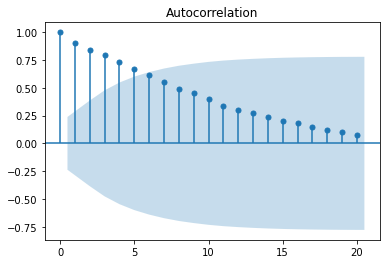

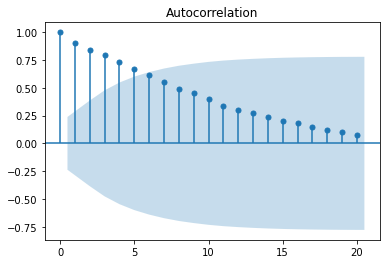

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Production'], lags=20)

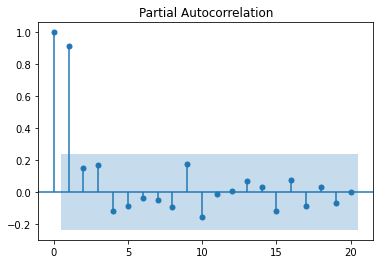

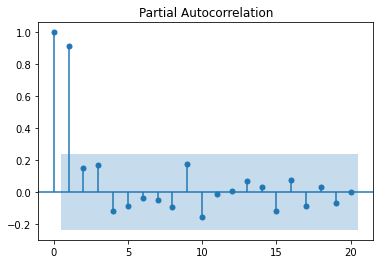

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Production'], lags = 20)

<AxesSubplot:xlabel='Year', ylabel='Production'>

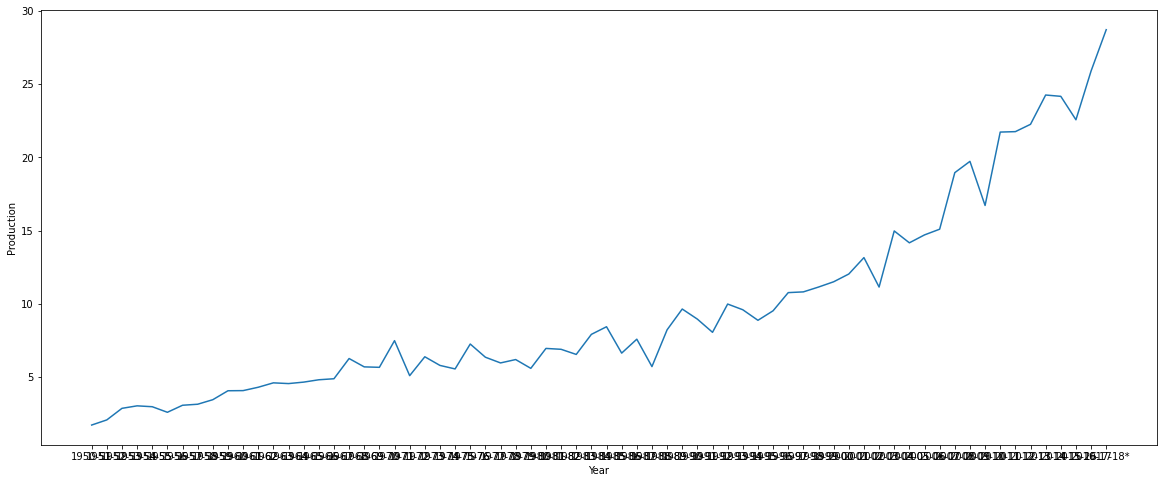

In [6]:
plt.figure(figsize=(20,8))
sns.lineplot(df['Year'], df['Production'])

In [7]:
# Train/Test Split
df_train = df[:61].copy()
df_test = df[61:].copy()

In [8]:
result=seasonal_decompose(df_train['Production'], model='multiplicable', period = 1)

<AxesSubplot:>

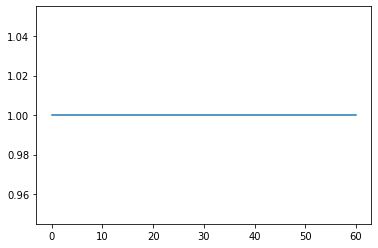

In [9]:
result.seasonal.plot()

<AxesSubplot:>

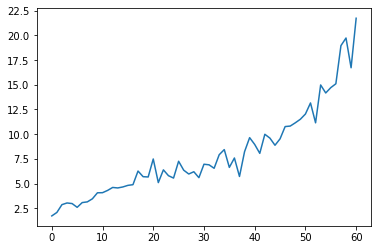

In [10]:
df_train['trend'] = result.trend
df_train['trend'].plot()

<AxesSubplot:>

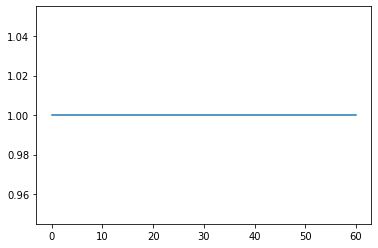

In [11]:
df_train['residual'] = result.resid
df_train['residual'].plot()

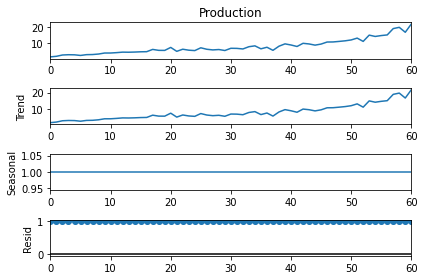

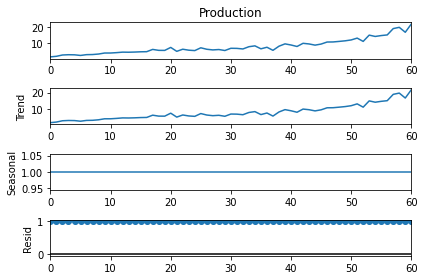

In [12]:
result.plot()

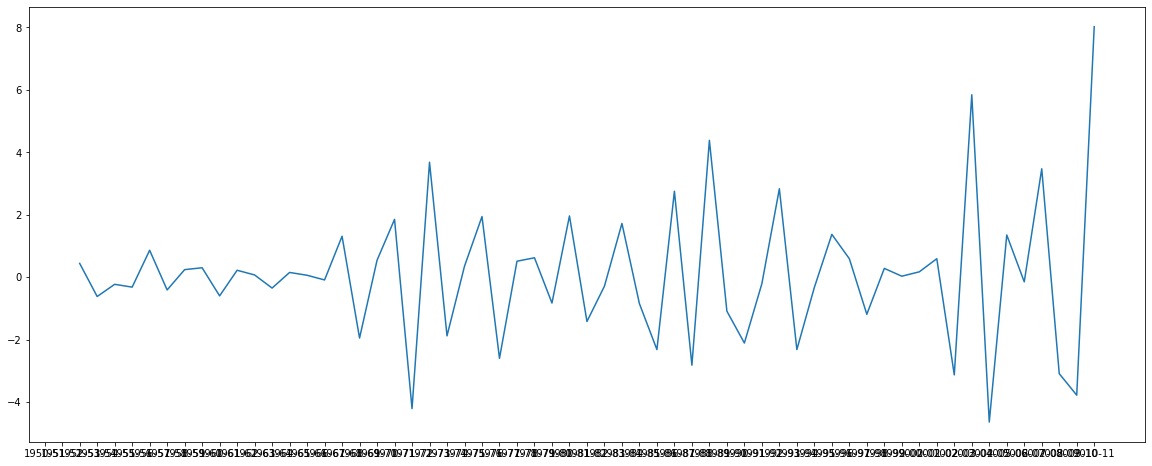

In [13]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
df_train['diff_Prod'] = df_train['Production'].diff()
df_train['diff_Prod2'] = df_train['diff_Prod'].dropna().diff()
pyplot.plot(df_train['Year'],df_train['diff_Prod2'])
pyplot.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adft = adfuller(df_train['diff_Prod2'].dropna(),autolag="AIC")

In [16]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                    "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -5.926401e+00              Test Statistics
1  2.437900e-07                      p-value
2  7.000000e+00             No. of lags used
3  5.100000e+01  Number of observations used
4 -3.565624e+00          critical value (1%)
5 -2.920142e+00          critical value (5%)
6 -2.598015e+00         critical value (10%)


#### We can see that our data is stationary from the fact that our p-value is less than 5 percent and the test statistic is less than critical value

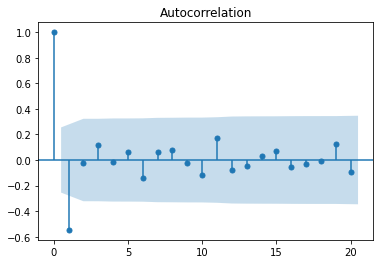

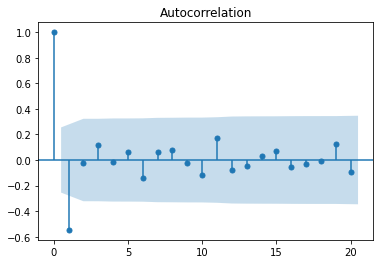

In [17]:
plot_acf(df_train['diff_Prod2'].dropna(), lags = 20)

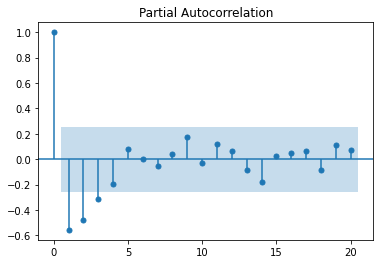

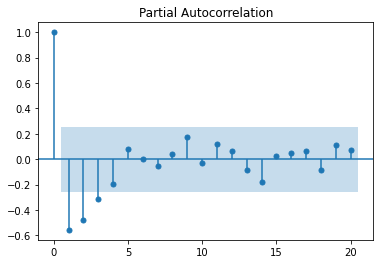

In [18]:
plot_pacf(df_train['diff_Prod2'].dropna(), lags = 20)

# ARIMA Fitting

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
k = df_train['diff_Prod2'].dropna()

In [21]:
arima_value = ARIMA(k, order=(1,0,1))
model1 = arima_value.fit()
print(model1.summary())

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [ ]:
arima_value = ARIMA(k, order=(2,0,1))
model2 = arima_value.fit()
print(model2.summary())

In [22]:
arima_value = ARIMA(k, order=(3,0,1))
model3 = arima_value.fit()
print(model3.summary())

                              ARMA Model Results                              
Dep. Variable:             diff_Prod2   No. Observations:                   59
Model:                     ARMA(3, 1)   Log Likelihood                 -89.018
Method:                       css-mle   S.D. of innovations              1.058
Date:                Thu, 26 May 2022   AIC                            190.035
Time:                        08:42:23   BIC                            202.501
Sample:                             0   HQIC                           194.901
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0130      0.009      1.405      0.160      -0.005       0.031
ar.L1.diff_Prod2    -0.8755      0.140     -6.236      0.000      -1.151      -0.600
ar.L2.diff_Prod2    -0.6884 

In [33]:
residual = model2.resid

NameError: name 'model2' is not defined

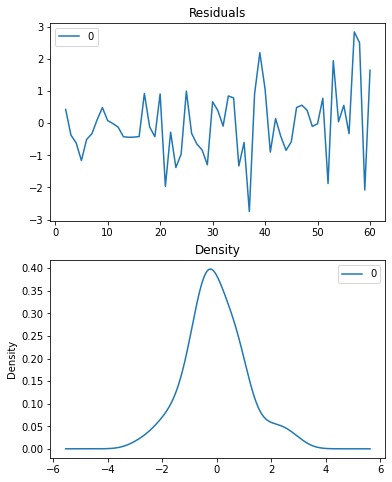

In [24]:
residuals = pd.DataFrame(model3.resid)
fig, ax = plt.subplots(2,1, figsize = [6,8])
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [25]:
df_train

,Year,Area,Production,Yield,Area under Irrigation(%),trend,residual,diff_Prod,diff_Prod2
0,1950-51,3.16,1.73,547,11.35,1.73,1.0,NaN,NaN
1,1951-52,3.31,2.08,627,16.42,2.08,1.0,0.35,NaN
2,1952-53,3.61,2.87,796,14.03,2.87,1.0,0.79,0.44
3,1953-54,3.87,3.04,785,11.5,3.04,1.0,0.17,-0.62
4,1954-55,3.75,2.98,794,14.59,2.98,1.0,-0.06,-0.23
...,...,...,...,...,...,...,...,...,...
56,2006-07,7.89,15.10,1912,22.25,15.10,1.0,0.39,-0.15
57,2007-08,8.12,18.96,2335,24.31,18.96,1.0,3.86,3.47
58,2008-09,8.17,19.73,2414,25.06,19.73,1.0,0.77,-3.09
59,2009-10,8.26,16.72,2024,24.21,16.72,1.0,-3.01,-3.78


In [26]:
df_test

,Year,Area,Production,Yield,Area under Irrigation(%)
61,2011-12,8.78,21.76,2478,25.67
62,2012-13,8.67,22.26,2566,25.89
63,2013-14,9.07,24.26,2676,27.15
64,2014-15,9.19,24.17,2632,26.63
65,2015-16,8.81,22.57,2563,-
66,2016-17,9.63,25.90,2689,-
67,2017-18*,9.47,28.72,3032,-


In [27]:
# arima
am = ARIMA(df_train['Production'], order=(2,2,1)) 
t = am.fit()
print(t.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Production   No. Observations:                   59
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -90.100
Method:                       css-mle   S.D. of innovations              1.078
Date:                Thu, 26 May 2022   AIC                            190.201
Time:                        08:42:25   BIC                            200.589
Sample:                             2   HQIC                           194.256
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0115      0.008      1.474      0.140      -0.004       0.027
ar.L1.D2.Production    -0.7533      0.123     -6.134      0.000      -0.994      -0.513
ar.L2.D2.Product

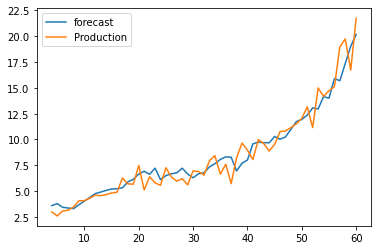

In [28]:
#print(am.value)
t.plot_predict(dynamic=False)
plt.show()

In [29]:
#df_train

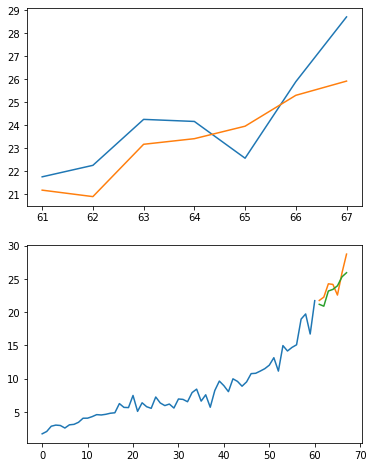

In [30]:
fc, se, cf = t.forecast(len(df_test), alpha = 0.05)

#make pandas series
fc_series = pd.Series(fc, index = df_test.index)
df_test['pred'] = fc


fig, ax = plt.subplots(2,1, figsize = [6,8])

ax[0].plot(df_test.Production)
ax[0].plot(fc_series)

ax[1].plot(df_train.Production)
ax[1].plot(df_test.Production)
ax[1].plot(fc_series)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = df_test['Production']
predictions = df_test['pred']
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1.415406


In [32]:
fc1, se, cf = t.forecast(12, alpha = 0.05)
fc1

array([21.18004783, 20.89887114, 23.17632251, 23.42005165, 23.96296625,
       25.30688753, 25.92613252, 26.72312056, 27.7686176 , 28.56537472,
       29.45315365, 30.42063332])